In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Let's create some synthetic data points
from sklearn.datasets import make_classification

In [28]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [29]:
X

array([[ 0.05839231, -1.33903727],
       [-0.52005477, -1.23519093],
       [-0.28348813,  0.83560095],
       ...,
       [ 1.55553473,  0.85667927],
       [-0.67081509, -1.19751904],
       [-0.83419912, -1.10180699]])

In [30]:
y

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,

In [31]:
pd.DataFrame(X)

,0,1
0,0.058392,-1.339037
1,-0.520055,-1.235191
2,-0.283488,0.835601
3,-2.899877,-0.479861
4,-0.691842,-1.522282
...,...,...
995,-0.090732,0.993665
996,2.221495,0.929144
997,1.555535,0.856679
998,-0.670815,-1.197519


In [32]:
pd.DataFrame(X)[0] #get first column from dataframe

0      0.058392
1     -0.520055
2     -0.283488
3     -2.899877
4     -0.691842
         ...   
995   -0.090732
996    2.221495
997    1.555535
998   -0.670815
999   -0.834199
Name: 0, Length: 1000, dtype: float64

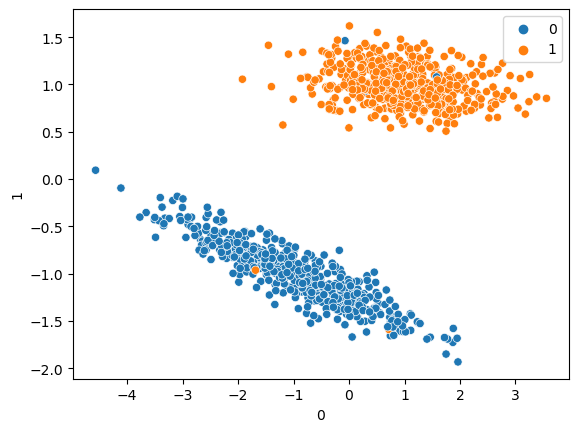

In [33]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y);

## When data points are clearly separable

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [34]:
from sklearn.svm import SVC

In [35]:
svc=SVC(kernel='linear') #kernel is used as linear as the data points are clearly seperable

In [37]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [62]:
svc.coef_

array([[2.99601784, 0.69230619]])

In [38]:
# Prediction
y_pred=svc.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test,y_pred)) # 100% accuracy because the data points are clearly separable
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       135
           1       0.99      1.00      1.00       115

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[134   1]
 [  0 115]]


## Case 2 - When data points are NOT clearly separable

In [41]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [42]:
X

array([[-0.67360895, -1.01297039],
       [-1.23439961,  2.01817277],
       [-0.61924057,  1.07760541],
       ...,
       [ 1.27180922,  0.86679169],
       [-0.65802823, -1.00218474],
       [-1.02159272,  1.06910461]])

In [43]:
y

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,

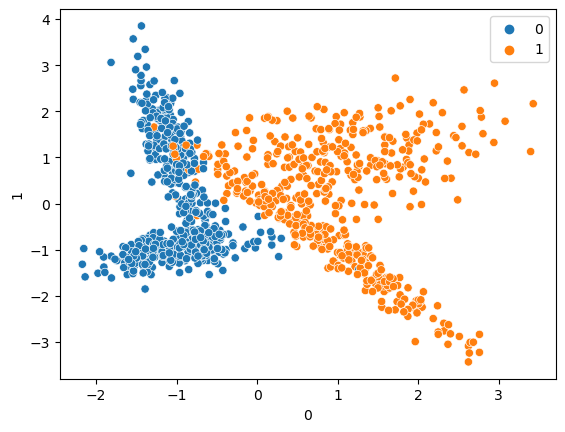

In [44]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y);

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [46]:
svc=SVC(kernel='linear')

In [47]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [48]:
# Prediction
y_pred=svc.predict(X_test)

In [49]:
print(classification_report(y_test,y_pred)) # 97% accuracy because the data points are NOT clearly separable-accuracy decreases
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.98      0.95      0.97       118

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[130   2]
 [  6 112]]


In [50]:
# thus cannot use linear SVC kernel, need to use another kernel
rbf=SVC(kernel='rbf')

In [51]:
rbf.fit(X_train,y_train)

SVC()

In [52]:
# Prediction
y_pred1=rbf.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred1)) # % accuracy increases a little with radial basis function kernel
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       132
           1       0.99      0.96      0.97       118

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[131   1]
 [  5 113]]


In [54]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)
# Prediction
y_pred2=polynomial.predict(X_test)
print(classification_report(y_test,y_pred2)) # polynomial gives less accuracy - poly worse than rbf
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       132
           1       0.93      0.96      0.95       118

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[124   8]
 [  5 113]]


In [55]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
# Prediction
y_pred3=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred3)) # signoid gives worse accuracy than poly and rbf
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       132
           1       0.83      0.86      0.85       118

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250

[[111  21]
 [ 16 102]]


In [63]:
sigmoid.intercept_

array([2.54220942])

## Conclusion: for data points which are not clearly separable, rbf kernel is the one to use!

## Hyperparameter tuning with SVC

In [57]:
# Now use rbf kernel and play with hyperparameters to get a better model

from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']}

In [58]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [59]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.973 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.960 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.987 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.973 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END ...C=1000, gamm

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [60]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [61]:
# Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4)) #played with 2 hyperparameters(C value and gamma value), get better accuracy
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       132
           1       1.00      0.96      0.98       118

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[132   0]
 [  5 113]]
